In [164]:
def data_reader(filename):
    samples=[]
    labels=[]
    with open(filename) as f:
        content = f.readlines()
    content = [x.strip() for x in content]
    for i in range(len(content)):
        sample_label=content[i].split("#")
        samples.append(sample_label[0])
        label= sample_label[4].split(" ")
        vector_label=[]
        for i in range(len(label)):
            if '=O' in label[i]:
                vector_label.append(0)
            elif '=T-POS' in label[i]:
                vector_label.append(1)
            elif '=T-NEU' in label[i]:
                vector_label.append(2)
            elif '=T-NEG' in label[i]:
                vector_label.append(3)
        labels.append(vector_label)
    return [samples,labels]

In [165]:
total_laptop_reviews=[]
total_rest_reviews=[]
total_laptop_labels=[]
total_rest_labels=[]

In [166]:
#laptop
laptop14_train=data_reader("laptop14/train.txt")
laptop14_dev=data_reader("laptop14/dev.txt")
laptop14_test=data_reader("laptop14/test.txt")

#rest14
rest14_train=data_reader("rest14/train.txt")
rest14_dev=data_reader("rest14/dev.txt")
rest14_test=data_reader("rest14/test.txt")

#rest15
rest15_train=data_reader("rest15/train.txt")
rest15_dev=data_reader("rest15/dev.txt")
rest15_test=data_reader("rest15/test.txt")

#rest16
rest16_train=data_reader("rest16/train.txt")
rest16_dev=data_reader("rest16/dev.txt")
rest16_test=data_reader("rest16/test.txt")

#test20
test20_test=data_reader("test20/test.txt")

In [167]:
laptop_reviews=laptop14_train[0]+laptop14_dev[0]+laptop14_test[0]
laptop_labels=laptop14_train[1]+laptop14_dev[1]+laptop14_test[1]

In [168]:
rest_reviews=rest14_train[0]+rest14_dev[0]+rest14_test[0]+rest15_train[0]+rest15_dev[0]+rest15_test[0]+rest16_train[0]+rest16_dev[0]+rest16_test[0]

In [169]:
len(rest_reviews)

8513

In [170]:
rest_labels=rest14_train[1]+rest14_dev[1]+rest14_test[1]+rest15_train[1]+rest15_dev[1]+rest15_test[1]+rest16_train[1]+rest16_dev[1]+rest16_test[1]

In [171]:
len(laptop_labels)

3845

In [172]:
import itertools
total_label=list(itertools.chain.from_iterable(rest_labels))

import collections

count_label = collections.Counter(total_label)
import operator
verb_dic = collections.Counter(count_label )
sorted_verb_dic = dict(sorted(verb_dic.items(), key=operator.itemgetter(1),reverse=True))
top_verb=[]
for i in range(4):
    top_verb.append(list(sorted_verb_dic.items())[i])

In [173]:
top_verb

[(0, 113626), (1, 8520), (3, 2603), (2, 1374)]

In [174]:
import matplotlib.pyplot as plt
import pandas as pd
df=pd.DataFrame(top_verb) 

In [175]:
df[0][0]='O'
df[0][1]='T-POS'
df[0][2]='T-NEG'
df[0][3]='T-NEU'

/Users/dongziming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/dongziming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dongziming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [176]:
df=df.drop([0],axis=0)

In [177]:
import itertools
total_laptop_label=list(itertools.chain.from_iterable(laptop_labels))

import collections

count_label = collections.Counter(total_laptop_label)
import operator
verb_dic = collections.Counter(total_laptop_label)
sorted_verb_dic = dict(sorted(verb_dic.items(), key=operator.itemgetter(1),reverse=True))
top_verb=[]
for i in range(4):
    top_verb.append(list(sorted_verb_dic.items())[i])

top_verb

import matplotlib.pyplot as plt
import pandas as pd
df1=pd.DataFrame(top_verb) 

df1[0][0]='O'
df1[0][1]='T-POS'
df1[0][2]='T-NEG'
df1[0][3]='T-NEU'

/Users/dongziming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/dongziming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/dongziming/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [178]:
df1=df1.drop([0],axis=0)

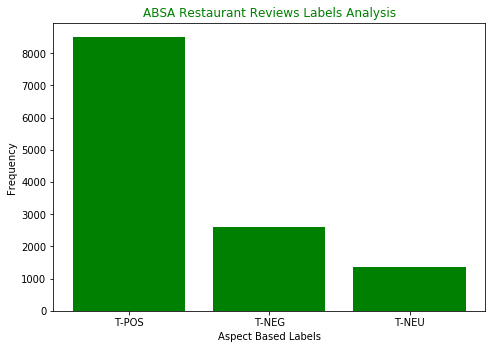

In [181]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(list(df[0]),list(df[1]),color=('Green'))
plt.xlabel("Aspect Based Labels")
plt.ylabel("Frequency")
plt.title('ABSA Restaurant Reviews Labels Analysis',color=('Green'))
plt.show()

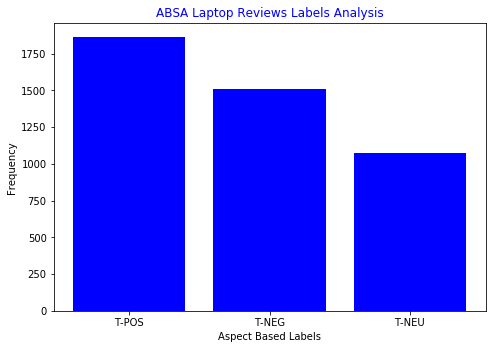

In [182]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(list(df1[0]),list(df1[1]),color=('blue'))
plt.xlabel("Aspect Based Labels")
plt.ylabel("Frequency")
plt.title('ABSA Laptop Reviews Labels Analysis',color=('blue'))
plt.show()